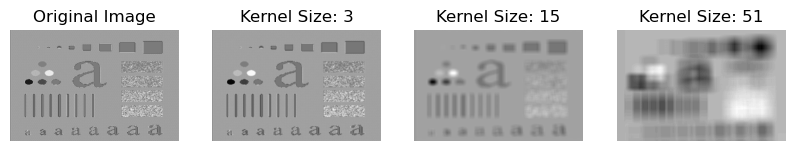

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_averaging_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)
    smoothed_image = cv2.filter2D(image, -1, kernel)
    return smoothed_image


image = cv2.imread(r"C:\Users\HP\Desktop\DIPLAB\Testimage\test_img.png", cv2.IMREAD_GRAYSCALE)

kernel_sizes = [3, 15, 51]
smoothed_images = []
 
for kernel_size in kernel_sizes:
    smoothed_image = apply_averaging_filter(gray_image, kernel_size)
    smoothed_images.append(smoothed_image)

plt.figure(figsize=(10, 4))
plt.subplot(1, len(kernel_sizes) + 1, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap = 'gray')
plt.axis('off')

for i, kernel_size in enumerate(kernel_sizes):
    plt.subplot(1, len(kernel_sizes) + 1, i + 2)
    plt.title("Kernel Size: " + str(kernel_size))
    plt.imshow(smoothed_images[i], cmap='gray')
    plt.axis('off')

plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_8864\3207091445.py:16: RuntimeWarning: divide by zero encountered in divide
  H = 1 / (1 + (D0 / D)**(2 * n))


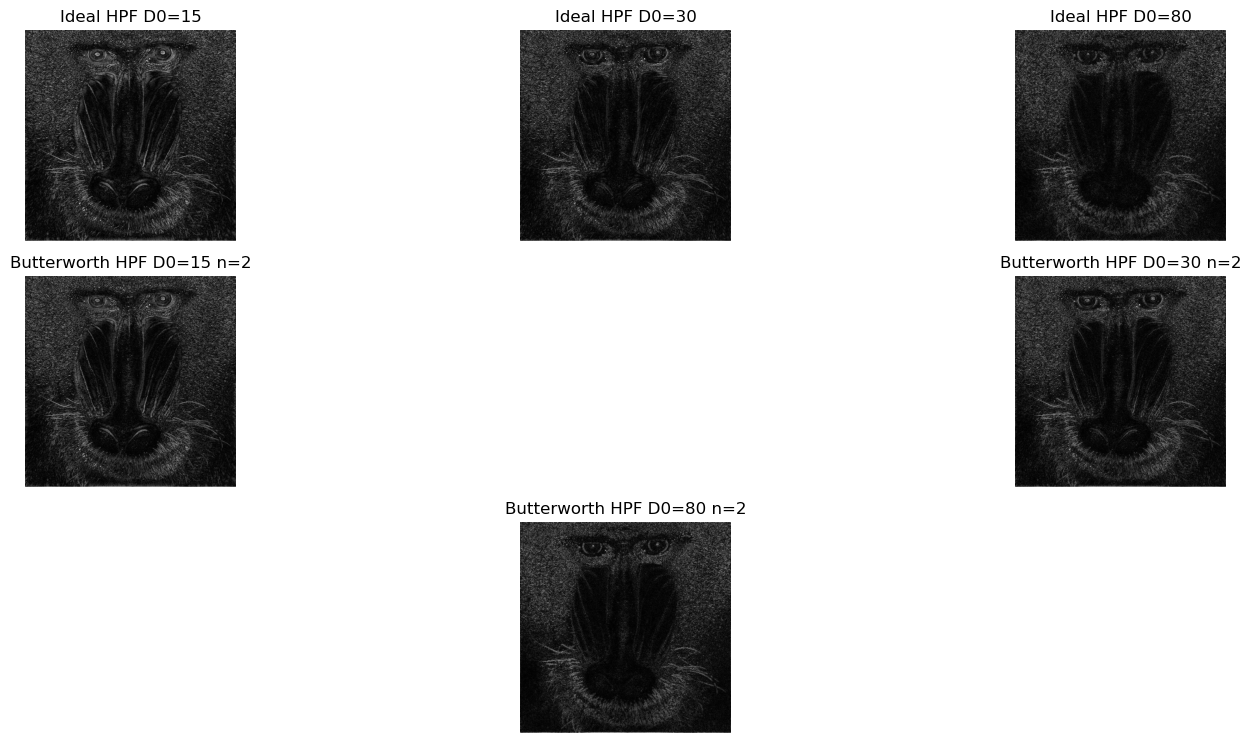

In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def ideal_high_pass_filter(shape, D0):
    P, Q = shape
    U, V = np.meshgrid(np.arange(P) - P // 2, np.arange(Q) - Q // 2)
    D = np.sqrt(U**2 + V**2)
    H = np.double(D > D0)
    return H

def butterworth_high_pass_filter(shape, D0, n):
    P, Q = shape
    U, V = np.meshgrid(np.arange(P) - P // 2, np.arange(Q) - Q // 2)
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D0 / D)**(2 * n))
    return H


def apply_filter(image, H):
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)
    filtered_shifted = f_transform_shifted * H
    f_ishift = np.fft.ifftshift(filtered_shifted)
    image_filtered = np.fft.ifft2(f_ishift)
    image_filtered = np.abs(image_filtered)
    return image_filtered


image = cv2.imread("C:/Users/HP/Desktop/DIPLAB/Testimage/Cbaboonn.jpg", cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError(f"Image at path {image_path} not found")

cutoff_frequencies = [15, 30, 80]

# Define orders for Butterworth filter
orders = [2]

plt.figure(figsize=(15, 10))

# Apply and display Ideal High Pass Filter results
for i, D0 in enumerate(cutoff_frequencies):
    H_ideal = ideal_high_pass_filter(image.shape, D0)
    image_ideal_filtered = apply_filter(image, H_ideal)
    plt.subplot(4, 3, i + 1)
    plt.imshow(image_ideal_filtered, cmap='gray')
    plt.title(f'Ideal HPF D0={D0}')
    plt.axis('off')

# Apply and display Butterworth High Pass Filter results
for j, D0 in enumerate(cutoff_frequencies):
    for k, n in enumerate(orders):
        H_butterworth = butterworth_high_pass_filter(image.shape, D0, n)
        image_butterworth_filtered = apply_filter(image, H_butterworth)
        plt.subplot(4, 3, 3 + j*2 + k + 1)
        plt.imshow(image_butterworth_filtered, cmap='gray')
        plt.title(f'Butterworth HPF D0={D0} n={n}')
        plt.axis('off')


plt.tight_layout()
plt.show()
